Google NACME AMLI Rock group

# Exploratory Data Analysis
In this section, we:
* loaded data 
* checked for missing data
* assigned an integer for each tool stage
* merged data for tool stages into one large dataframe
* cleaned the large dataframe
* filled missing data
* visualized correlation between columns

This model uses decision trees to determine the stages of production between three data sets of chert microdebitage.

In [ ]:
# load data
import pandas as pd
import numpy as np
chert_hh_1 = pd.read_excel("/content/EXP-00001-Master.xlsx")
chert_hh_2 = pd.read_excel("/content/EXP-00002-Master.xlsx")
chert_sh = pd.read_excel("/content/EXP-00003-Master.xlsx")

In [ ]:
# show dataframe summaries
print('Chert HH1 summary ', chert_hh_1.describe())
print('================================')
print('Chert HH2 summary ', chert_hh_2.describe())
print('================================')
print('Chert SH summary ', chert_sh.describe())

In [ ]:
# check for missing data
print('Chert HH1 missing data? ', chert_hh_1.isna().sum())
print('================================')
print('Chert HH2 missing data? \n', chert_hh_2.isna().sum())
print('================================')
print('Chert SH missing data? \n', chert_sh.isna().sum())

In [ ]:
# add target column, stage, to each dataframe
chert_hh_1['Stage'] = 1
chert_hh_2['Stage'] = 2
chert_sh['Stage'] = 3

# join dataframes
dfs = [chert_hh_1, chert_hh_2, chert_sh]
chert_df = pd.concat(dfs)

# remove unecessary columns + row 0
chert_df.drop(columns = ['Id',
                         'Filter0',
                         'Filter1', 
                         'Filter2', 
                         'Filter3', 
                         'Filter4', 
                         'Filter5', 
                         'Filter6', 
                         'hash', 
                         'Img Id',
                         'Transparency',
                         'Curvature',
                         'Angularity'], inplace = True)
chert_df.drop(0, inplace = True)

# check for missing values again and fill
chert_df.fillna(0, inplace = True)          
print('Missing data filled.')
chert_df.isna().sum()

Missing data filled.


Da                    0
Dp                    0
FWidth                0
FLength               0
FThickness            0
ELength               0
EThickness            0
EWidth                0
Volume                0
Area                  0
Perimeter             0
CHull  Area           0
CHull Perimeter       0
Sphericity            0
L/T Ratio             0
T/L Aspect Ratio      0
Compactness           0
Roundness             0
Ellipse Ratio         0
Circularity           0
Solidity              0
Concavity             0
Convexity             0
Extent                0
Surface Area          0
L/W Ratio             0
W/L Ratio             0
W/T Ratio             0
T/W Ratio             0
CHull Surface Area    0
Sieve                 0
Ellipticity           0
Fiber Length          0
Fiber Width           0
Stage                 0
dtype: int64

In [ ]:
print(chert_df.head(10))
print(chert_df.tail(10))

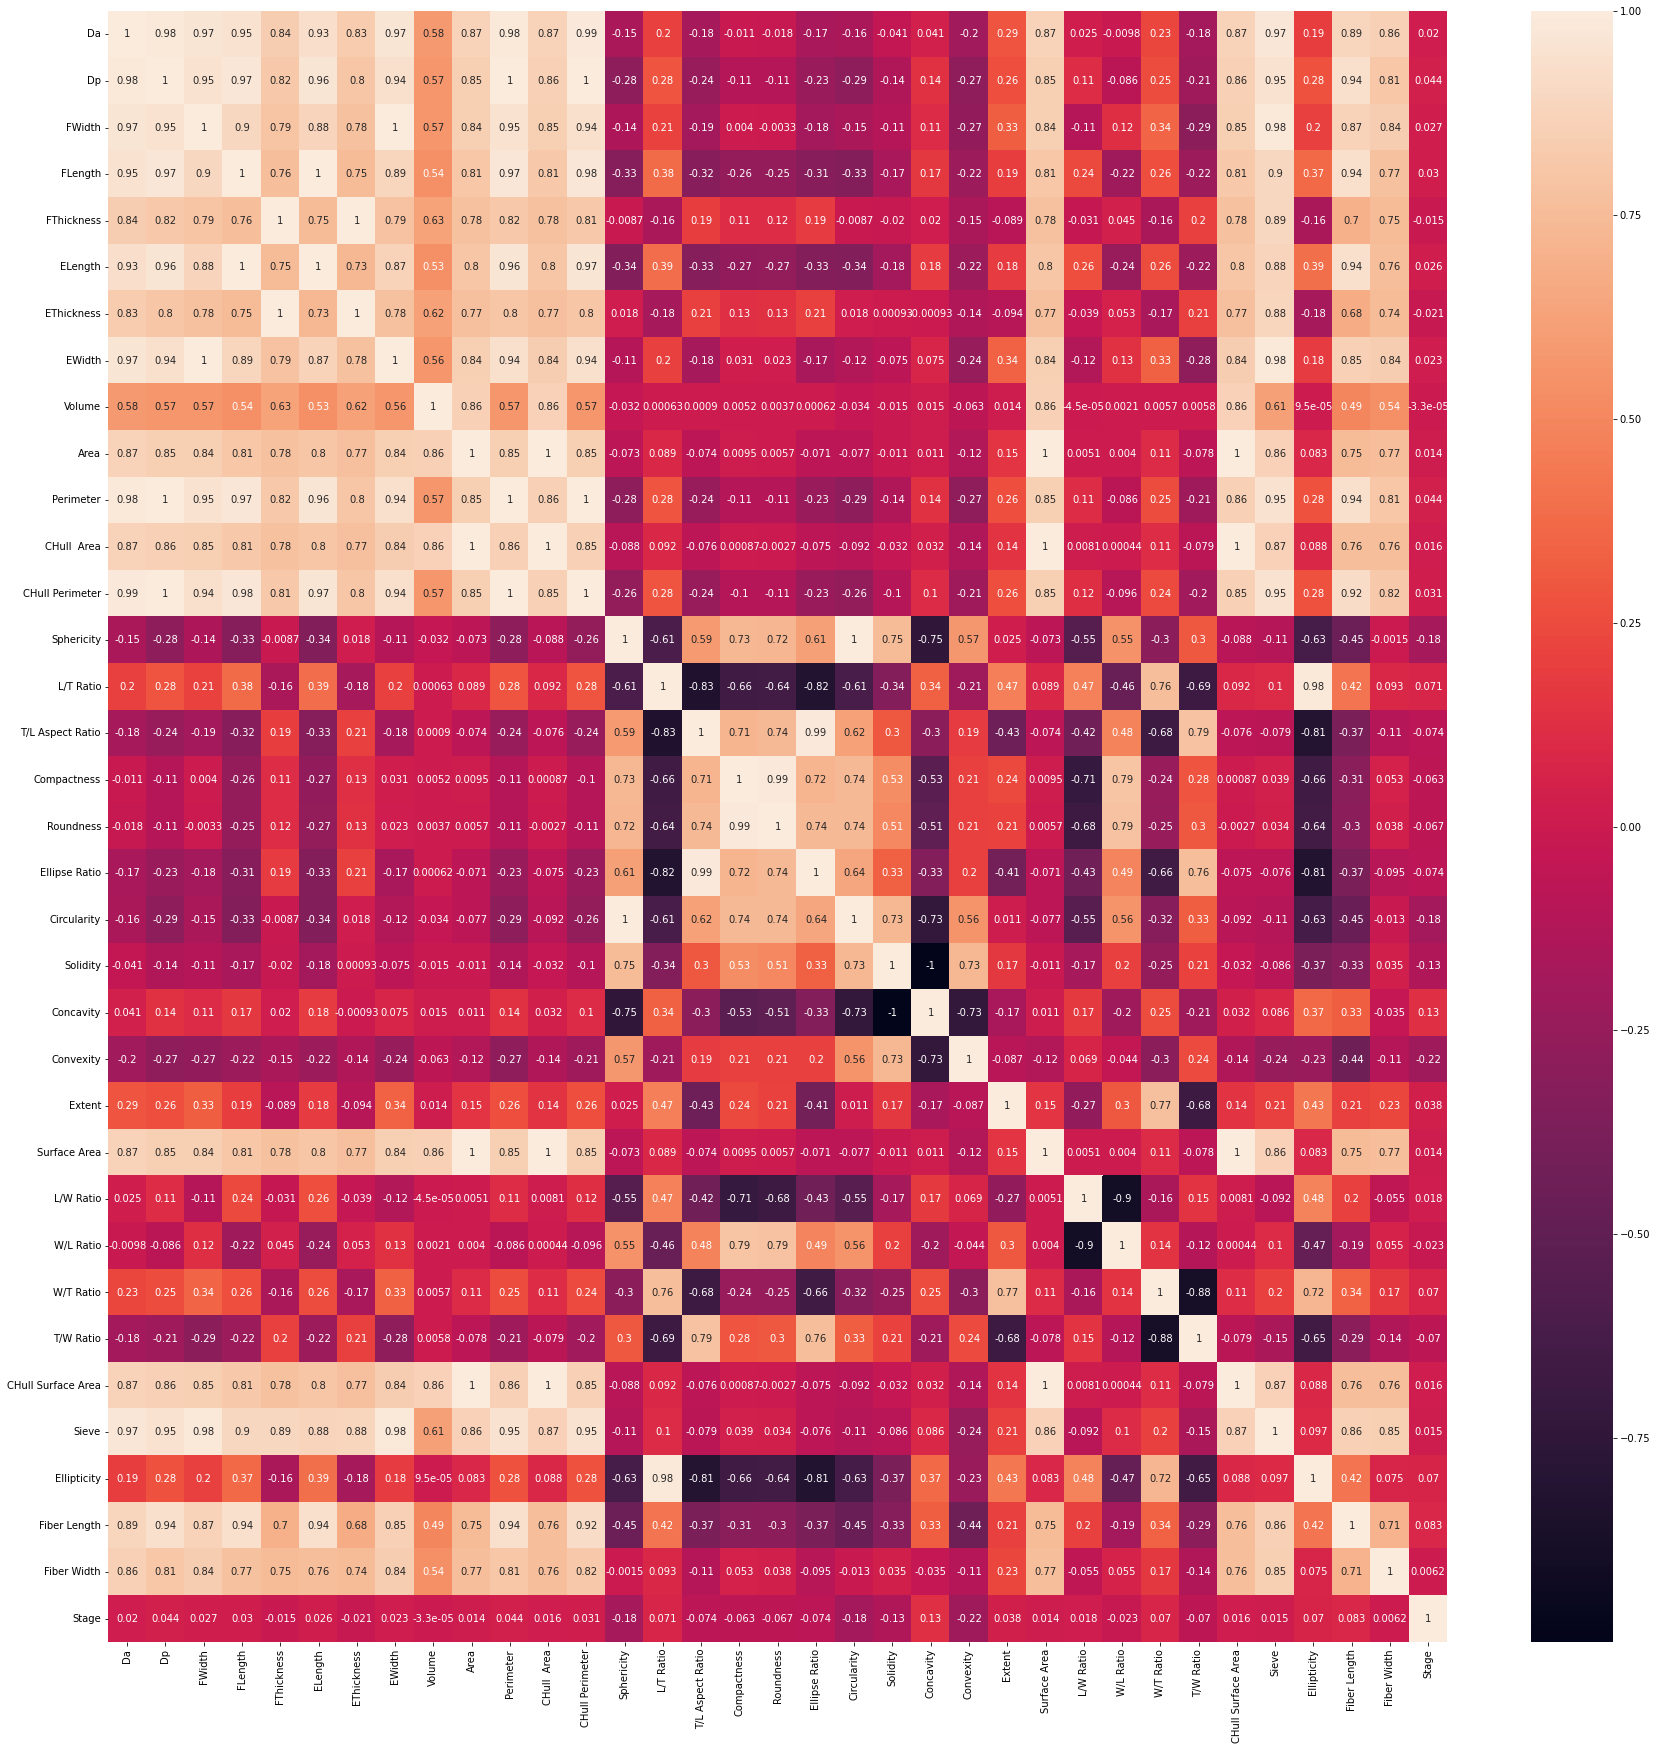

In [ ]:
# show heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (30,30))
sns.heatmap(chert_df.corr(), annot = True)

# Decision Tree Modeling
Multiclass Classification

## Basic Decision Tree Model

In [ ]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# features and target
features = chert_df.loc[:, chert_df.columns != 'Stage']
feature_names = features.columns

target = chert_df['Stage']
target_name = 'Stage'

# split data
x_train, x_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.3,
    random_state = 10
)

# train model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

dt = tree.DecisionTreeClassifier(
    criterion = 'gini'                          # Accuracy: gini 0.4375515980658096
)                                               # Accuracy: entropy 0.43681448283995755

dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

## Tuning Decision Tree Model w/o GridSearchCV

In [ ]:
# determine best max_depth
depth_list = []
acc_list = []
for i in range(1,100):
  dt = tree.DecisionTreeClassifier(
    criterion = 'gini', 
    max_depth = i,
    random_state = 10)
  # fit tree
  dt.fit(x_train, y_train)
  # get predictions
  y_pred = dt.predict(x_test)
  # get accuracy for each iteration and append to list
  acc = metrics.accuracy_score(y_test, y_pred)
  acc_list.append(acc)
  depth_list.append(i)

# show graph of accuracy vs parameter value
plt.plot(depth_list, acc_list)
plt.show()

print(max(acc_list))
for xy in zip(depth_list, acc_list):
   print(xy)

## GridSearchCV

In [ ]:
# using grid search and comparing accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics 
from sklearn.metrics import classification_report

# split data
x_train, x_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.3,
    random_state = 10
)

# train model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1, 20),
    "min_samples_split":range(1,50),
    "min_samples_leaf":range(1,20)
}

# finding best hyperparameters using gridsearchcv
grid = GridSearchCV(
    decision_tree, 
    param_grid = param_dict,
    cv = 3,
    verbose = 1,
    n_jobs = -1)

grid.fit(x_train, y_train)

#predictions = svc_model.predict(x_test)
#print(classification_report(y_test, predictions))

# Random Forest

In [ ]:
# create a baseline random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

features = chert_df.loc[:, chert_df.columns != 'Stage']
feature_names = features.columns

target = chert_df['Stage']
target_name = 'Stage'

x_train, x_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.3,
    random_state = 10
)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# make predictions and compare
y_pred = rf.predict(x_test)
print(y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

[2 2 2 ... 2 1 1]
Accuracy:  0.5386838070527185


## GridSearchCV


In [ ]:
# use RandomizedSearchCV to find best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid) 


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Random search training: fitting model
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions = random_grid,
    n_iter = 100,   # num combinations to search
    cv = 3,         # num of folds to use for cross val
    verbose = 2,
    random_state = 10,
    n_jobs = -1,
    refit = True)

search = rf.fit(x_train, y_train)
# get best parameters
search.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Random search tuning: fitting model
hyper_rf = RandomForestClassifier(
    bootstrap = True,
    ccp_alpha = 0.0,
    class_weight= None,
    criterion = 'gini',
    max_features = 'auto',
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_weight_fraction_leaf = 0.0,
    n_estimators = 100,
    oob_score = False,
    random_state = 10,
    verbose = 0,
    warm_start = False
)

hyper_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [ ]:
# get predictions and accuracy
hyper_pred = hyper_rf.predict(x_test)
print(hyper_pred)
accuracy = metrics.accuracy_score(y_test, hyper_pred)
print('Accuracy: ', accuracy) # accuracy got worse :-(

[2 2 2 ... 2 1 1]
Accuracy:  0.5372685458190825


## Feature Selection

In [ ]:
# Feature selection by ExtraTreesRegressor(model based)

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

x_train, x_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.3,
    random_state=10)

reg= ExtraTreesRegressor()
reg.fit(x_train,y_train)


ExtraTreesRegressor()

[0.01974828 0.02020222 0.02617083 0.02383547 0.02511494 0.02838449
 0.02673399 0.02851609 0.02279991 0.01818203 0.0201315  0.01879243
 0.02038037 0.04342576 0.02466729 0.02522804 0.03036036 0.03084637
 0.02737184 0.04684054 0.04415435 0.04270869 0.08706654 0.03073462
 0.01834691 0.02883377 0.02941722 0.02614625 0.02710217 0.01888993
 0.02612328 0.02629656 0.02914352 0.03730344]


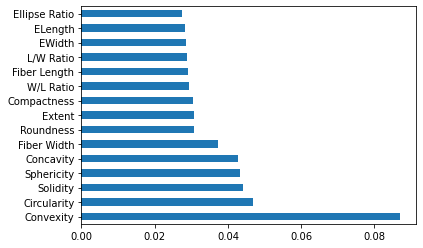

In [ ]:
print(reg.feature_importances_)
feat_importances = pd.Series(reg.feature_importances_, index=x_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()
